# Problema 2
Load libraries

In [50]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Now make the database

In [13]:
d1 = {'x1' : [0,1,0,1],'x2' : [0,0,1,1],'op_a' : [1,1,1,0],'op_b' : [0,0,0,1]}

In [17]:
df = pd.DataFrame.from_dict(d1)
df

,x1,x2,op_a,op_b
0,0,0,1,0
1,1,0,1,0
2,0,1,1,0
3,1,1,0,1


In [26]:
x_train = df.loc[:,['x1','x2']]
y_train = df.loc[:,['op_a','op_b']]
y_train_1 = df.loc[:,'op_a']
y_train_2 = df.loc[:,'op_b']

In [81]:
pred_1 = [[1.001], [0], [.001], [1]]
pred_2 = [[0], [1], [0], [1]]
pred_3 = [[0], [1], [1], [0]]
pred_1

[[1.001], [0], [0.001], [1]]

In [43]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df , pred_2, test_size=0.3)

We are ready to construct the model, we are going to use a neural network with keras. 

In [61]:
def nn_model():
    model = Sequential()
    model.add(Dense(60, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = nn_model()

Ajust model

In [62]:
resultados = model.fit( x_train,  y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 1.1888 - mae: 1.0903 - val_loss: 5.0276e-07 - val_mae: 7.0906e-04
Epoch 2/100
1/1 - 0s - loss: 1.0586 - mae: 1.0289 - val_loss: 6.9048e-04 - val_mae: 0.0263
Epoch 3/100
1/1 - 0s - loss: 0.9722 - mae: 0.9860 - val_loss: 0.0024 - val_mae: 0.0486
Epoch 4/100
1/1 - 0s - loss: 0.9037 - mae: 0.9506 - val_loss: 0.0047 - val_mae: 0.0683
Epoch 5/100
1/1 - 0s - loss: 0.8455 - mae: 0.9195 - val_loss: 0.0074 - val_mae: 0.0861
Epoch 6/100
1/1 - 0s - loss: 0.7943 - mae: 0.8913 - val_loss: 0.0105 - val_mae: 0.1026
Epoch 7/100
1/1 - 0s - loss: 0.7483 - mae: 0.8650 - val_loss: 0.0140 - val_mae: 0.1181
Epoch 8/100
1/1 - 0s - loss: 0.7062 - mae: 0.8404 - val_loss: 0.0177 - val_mae: 0.1329
Epoch 9/100
1/1 - 0s - loss: 0.6673 - mae: 0.8169 - val_loss: 0.0216 - val_mae: 0.1470
Epoch 10/100
1/1 - 0s - loss: 0.6311 - mae: 0.7944 - val_loss: 0.0258 - val_mae: 0.1606
Epoch 11/100
1/1 - 0s - loss: 0.5971 - mae: 0.7727 - val_loss: 0.0302 - val_mae: 0.1738
Epoch 12/100
1/1 - 0s - loss:

Epoch 93/100
1/1 - 0s - loss: 4.2988e-13 - mae: 6.5565e-07 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 94/100
1/1 - 0s - loss: 8.8818e-14 - mae: 2.9802e-07 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 95/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 96/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 97/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 98/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 99/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703
Epoch 100/100
1/1 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - val_loss: 0.4493 - val_mae: 0.6703


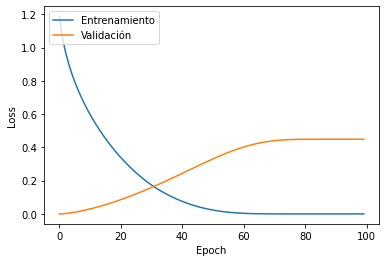

In [63]:
plt.plot(resultados.history['loss'])
plt.plot(resultados.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [64]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
test_mae_score

1/1 [==============================] - 0s 17ms/step - loss: 0.2802 - mae: 0.5216


0.5215883255004883

In [65]:
x_train

,x1,x2,op_a,op_b
1,1,0,1,0
0,0,0,1,0


In [66]:
predicciones = model.predict(x_train)
print(predicciones)

[[0.9999999]
 [0.6703211]]


Hacemos un modelo para la primera operación

In [89]:
def nnain_model():
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])
    return model

model = nnain_model()

In [ ]:
#You have to run the previous function
#el target data es el vector a predecir!!

training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[0],[1],[1],[0]], "float32")

model.fit(training_data, target_data, epochs=1000)
scores = model.evaluate(training_data, pred_3)
#

Epoch 1/1000
1/1 [==============================] - 0s 368ms/step - loss: 0.2513 - binary_accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2505 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2496 - binary_accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2487 - binary_accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2479 - binary_accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2470 - binary_accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2462 - binary_accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.2454 - binary_accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2445 - binary_accuracy: 0.7500
Epoch 10/1000
1/1 [==============================]

Epoch 78/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2036 - binary_accuracy: 1.0000
Epoch 79/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2030 - binary_accuracy: 1.0000
Epoch 80/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2025 - binary_accuracy: 1.0000
Epoch 81/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2020 - binary_accuracy: 1.0000
Epoch 82/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.2015 - binary_accuracy: 1.0000
Epoch 83/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2010 - binary_accuracy: 1.0000
Epoch 84/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2005 - binary_accuracy: 1.0000
Epoch 85/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2000 - binary_accuracy: 1.0000
Epoch 86/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1994 - binary_accuracy: 1.0000
Epoch 87/1000
1/1 [======================

1/1 [==============================] - 0s 4ms/step - loss: 0.1601 - binary_accuracy: 1.0000
Epoch 155/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1595 - binary_accuracy: 1.0000
Epoch 156/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1589 - binary_accuracy: 1.0000
Epoch 157/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1583 - binary_accuracy: 1.0000
Epoch 158/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1577 - binary_accuracy: 1.0000
Epoch 159/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1571 - binary_accuracy: 1.0000
Epoch 160/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1564 - binary_accuracy: 1.0000
Epoch 161/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1558 - binary_accuracy: 1.0000
Epoch 162/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1552 - binary_accuracy: 1.0000
Epoch 163/1000
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.1140 - binary_accuracy: 1.0000
Epoch 230/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1134 - binary_accuracy: 1.0000
Epoch 231/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.1128 - binary_accuracy: 1.0000
Epoch 232/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1122 - binary_accuracy: 1.0000
Epoch 233/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1116 - binary_accuracy: 1.0000
Epoch 234/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1110 - binary_accuracy: 1.0000
Epoch 235/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1105 - binary_accuracy: 1.0000
Epoch 236/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1099 - binary_accuracy: 1.0000
Epoch 237/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1093 - binary_accuracy: 1.0000
Epoch 238/1000
1/1 [=============================

Epoch 305/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0746 - binary_accuracy: 1.0000
Epoch 306/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0742 - binary_accuracy: 1.0000
Epoch 307/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0737 - binary_accuracy: 1.0000
Epoch 308/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0733 - binary_accuracy: 1.0000
Epoch 309/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0729 - binary_accuracy: 1.0000
Epoch 310/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0724 - binary_accuracy: 1.0000
Epoch 311/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0720 - binary_accuracy: 1.0000
Epoch 312/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0716 - binary_accuracy: 1.0000
Epoch 313/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0712 - binary_accuracy: 1.0000
Epoch 314/1000
1/1 [=============

1/1 [==============================] - 0s 4ms/step - loss: 0.0472 - binary_accuracy: 1.0000
Epoch 382/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.0469 - binary_accuracy: 1.0000
Epoch 383/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0467 - binary_accuracy: 1.0000
Epoch 384/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0464 - binary_accuracy: 1.0000
Epoch 385/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0461 - binary_accuracy: 1.0000
Epoch 386/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0458 - binary_accuracy: 1.0000
Epoch 387/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0456 - binary_accuracy: 1.0000
Epoch 388/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0453 - binary_accuracy: 1.0000
Epoch 389/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0450 - binary_accuracy: 1.0000
Epoch 390/1000
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.0305 - binary_accuracy: 1.0000
Epoch 457/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0303 - binary_accuracy: 1.0000
Epoch 458/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0301 - binary_accuracy: 1.0000
Epoch 459/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0300 - binary_accuracy: 1.0000
Epoch 460/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0298 - binary_accuracy: 1.0000
Epoch 461/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0296 - binary_accuracy: 1.0000
Epoch 462/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0295 - binary_accuracy: 1.0000
Epoch 463/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0293 - binary_accuracy: 1.0000
Epoch 464/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0291 - binary_accuracy: 1.0000
Epoch 465/1000
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.0203 - binary_accuracy: 1.0000
Epoch 533/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0202 - binary_accuracy: 1.0000
Epoch 534/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0201 - binary_accuracy: 1.0000
Epoch 535/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0200 - binary_accuracy: 1.0000
Epoch 536/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0199 - binary_accuracy: 1.0000
Epoch 537/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0198 - binary_accuracy: 1.0000
Epoch 538/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0197 - binary_accuracy: 1.0000
Epoch 539/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0196 - binary_accuracy: 1.0000
Epoch 540/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 541/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0142 - binary_accuracy: 1.0000
Epoch 609/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0141 - binary_accuracy: 1.0000
Epoch 610/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0141 - binary_accuracy: 1.0000
Epoch 611/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0140 - binary_accuracy: 1.0000
Epoch 612/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 613/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0139 - binary_accuracy: 1.0000
Epoch 614/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0138 - binary_accuracy: 1.0000
Epoch 615/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0137 - binary_accuracy: 1.0000
Epoch 616/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0137 - binary_accuracy: 1.0000
Epoch 617/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0104 - binary_accuracy: 1.0000
Epoch 684/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0103 - binary_accuracy: 1.0000
Epoch 685/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0103 - binary_accuracy: 1.0000
Epoch 686/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0102 - binary_accuracy: 1.0000
Epoch 687/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0102 - binary_accuracy: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0102 - binary_accuracy: 1.0000
Epoch 689/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 690/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0101 - binary_accuracy: 1.0000
Epoch 691/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0100 - binary_accuracy: 1.0000
Epoch 692/1000
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.0078 - binary_accuracy: 1.0000


In [88]:
print('The prediction of vecto', pred_2, 'is:\n')
for a in model.predict(training_data):
    print(a)
#print(model.predict(training_data))

The prediction of vecto [[0], [1], [0], [1]] is:

[0.24782404]
[0.9285851]
[0.88970864]
[0.24782404]
